In [1]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf


In [2]:

# Definieer de geometrie van het benzeenmolecuul met waterstofatomen
benzene_geometry_with_H = '''
   C        0.00000        1.39767        0.00000
   C        1.20912        0.69884        0.00000
   C        1.20912       -0.69884        0.00000
   C        0.00000       -1.39767        0.00000
   C       -1.20912       -0.69884        0.00000
   C       -1.20912        0.69884        0.00000
   H        0.00000        2.49029        0.00000
   H        2.15741        1.24515        0.00000
   H        2.15741       -1.24515        0.00000
   H        0.00000       -2.49029        0.00000
   H       -2.15741       -1.24515        0.00000
   H       -2.15741        1.24515        0.00000
'''

# Creëer het moleculaire object
benzene_molecule_with_H = gto.M(atom=benzene_geometry_with_H, basis='sto-3g')

pz_indices = [i for i, label in enumerate(benzene_molecule_with_H.ao_labels()) if 'C 2pz' in label]
print(pz_indices)

hf = scf.RHF(benzene_molecule_with_H)
hf_energy = hf.kernel()
print(hf.analyze())
# Atomaire orbitalen labels
ao_labels = benzene_molecule_with_H.ao_labels()
print("\nAtomaire orbitalen labels:")
print(ao_labels)

# Moleculaire orbitalen coefficients
mo_coeff = hf.mo_coeff.round(6)
def normaliseer(eigenvectors):
    eigenvectors = eigenvectors.T
    for index, eigenvector in enumerate(eigenvectors):
        eigenvectors[index] = eigenvector * (np.dot(eigenvector, eigenvector))**(-1/2)
    return eigenvectors.T
mo_coeff = normaliseer(mo_coeff)
print("\nMoleculaire orbitalen coefficients:")
print(mo_coeff)
mo_eigenvalues = hf.mo_energy
print(mo_eigenvalues)
pz_orbitals = mo_coeff[pz_indices]
print(pz_orbitals)




[4, 9, 14, 19, 24, 29]
converged SCF energy = -227.88998606888
**** MO energy ****
MO #1   energy= -11.0291897898139  occ= 2
MO #2   energy= -11.0291646082121  occ= 2
MO #3   energy= -11.0291487145593  occ= 2
MO #4   energy= -11.0288388946667  occ= 2
MO #5   energy= -11.0288220572905  occ= 2
MO #6   energy= -11.0286906289362  occ= 2
MO #7   energy= -1.08803471456046  occ= 2
MO #8   energy= -0.952931344406926 occ= 2
MO #9   energy= -0.952285636379976 occ= 2
MO #10  energy= -0.764238410633297 occ= 2
MO #11  energy= -0.764104592392898 occ= 2
MO #12  energy= -0.658391504948944 occ= 2
MO #13  energy= -0.590654409120987 occ= 2
MO #14  energy= -0.551767608896164 occ= 2
MO #15  energy= -0.531882312802454 occ= 2
MO #16  energy= -0.53101003991179  occ= 2
MO #17  energy= -0.454720807400124 occ= 2
MO #18  energy= -0.4309626512529   occ= 2
MO #19  energy= -0.430922021205681 occ= 2
MO #20  energy= -0.279189035851883 occ= 2
MO #21  energy= -0.278571920580729 occ= 2
MO #22  energy= 0.268377310926063  

In [3]:


# Creëer het moleculaire object
benzene_molecule_with_H_expanded_basis = gto.M(atom=benzene_geometry_with_H, basis='ccpvdz')


pz_indices_exp = [i for i, label in enumerate(benzene_molecule_with_H_expanded_basis.ao_labels()) if 'C 2pz' in label]
print(pz_indices_exp)

hf_exp = scf.RHF(benzene_molecule_with_H_expanded_basis)

hf_energy_exp = hf_exp.kernel()
print(hf_energy_exp)
print()
# Atomaire orbitalen labels
ao_labels_exp = benzene_molecule_with_H_expanded_basis.ao_labels()
print("\nAtomaire orbitalen labels:")
print(ao_labels_exp)

# Moleculaire orbitalen coefficients
mo_coeff_exp = hf_exp.mo_coeff.round(6)
print("\nMoleculaire orbitalen coefficients:")
print(mo_coeff_exp)
mo_eigenvalues_exp = hf_exp.mo_energy
print(mo_eigenvalues_exp)
pz_orbitals_exp = mo_coeff_exp[pz_indices_exp]
print(pz_orbitals_exp)

[5, 19, 33, 47, 61, 75]
converged SCF energy = -230.7213472914
-230.72134729139955


Atomaire orbitalen labels:
['0 C 1s    ', '0 C 2s    ', '0 C 3s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '0 C 3px   ', '0 C 3py   ', '0 C 3pz   ', '0 C 3dxy  ', '0 C 3dyz  ', '0 C 3dz^2 ', '0 C 3dxz  ', '0 C 3dx2-y2', '1 C 1s    ', '1 C 2s    ', '1 C 3s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '1 C 3px   ', '1 C 3py   ', '1 C 3pz   ', '1 C 3dxy  ', '1 C 3dyz  ', '1 C 3dz^2 ', '1 C 3dxz  ', '1 C 3dx2-y2', '2 C 1s    ', '2 C 2s    ', '2 C 3s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '2 C 3px   ', '2 C 3py   ', '2 C 3pz   ', '2 C 3dxy  ', '2 C 3dyz  ', '2 C 3dz^2 ', '2 C 3dxz  ', '2 C 3dx2-y2', '3 C 1s    ', '3 C 2s    ', '3 C 3s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '3 C 3px   ', '3 C 3py   ', '3 C 3pz   ', '3 C 3dxy  ', '3 C 3dyz  ', '3 C 3dz^2 ', '3 C 3dxz  ', '3 C 3dx2-y2', '4 C 1s    ', '4 C 2s    ', '4 C 3s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '4 C 3px   ', '

In [4]:
mol = gto.M(atom='''
   C        0.00000        1.40272        0.00000
   C        1.21479        0.70136        0.00000
   C        1.21479       -0.70136        0.00000
   C        0.00000       -1.40272        0.00000
   C       -1.21479       -0.70136        0.00000
   C       -1.21479        0.70136        0.00000
   H        0.00000        2.49164        0.00000
   H        2.15741        1.24582        0.00000
   H        2.15741       -1.24582        0.00000
   H        0.00000       -2.49164        0.00000
   H       -2.15741       -1.24582        0.00000
   H       -2.15741        1.24582        0.00000
''', basis='ccpvdz')

# Kies het SCF (Self-Consistent Field) object
mf = scf.RHF(mol)
mf.init_guess = 'hcore'
# Voer de SCF-berekening uit
mf.verbose = 4  # Verhoog de verbose-waarde voor meer uitvoer
mf.run()


print(mf.conv_tol)
print(mf.get_fock())




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = hcore
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>


diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf/tmpy__mdpvw
max_memory 4000 MB (current use 405 MB)
Set gradient conv threshold to 3.16228e-05
Initial guess from hcore.
  HOMO = -13.7385914829072  LUMO = -13.595216965968
init E= -194.803114899016
  HOMO = 0.50067776995243  LUMO = 0.550578608759845
cycle= 1 E= -191.009279677467  delta_E= 3.79  |g|=  7.4  |ddm|=  198
  HOMO = -2.73536748661809  LUMO = -2.72633871275994
cycle= 2 E= -206.132547335861  delta_E= -15.1  |g|= 7.53  |ddm|=  199
  HOMO = -0.942150076117665  LUMO = -0.597634354162848
cycle= 3 E= -229.28204603761  delta_E= -23.1  |g|= 2.06  |ddm|= 13.3
  HOMO = -0.525896727545224  LUMO = -0.0593602023263385
cycle= 4 E= -230.216282721874  delta_E= -0.934  |g|= 1.32  |ddm|= 1.49
  HOMO = -0.432833204091134  LUM

In [5]:
from pyscf import gto, scf

# Definieer je moleculaire systeem
mol = gto.M(atom='''
   C        0.00000        1.40272        0.00000
   C        1.21479        0.70136        0.00000
   C        1.21479       -0.70136        0.00000
   C        0.00000       -1.40272        0.00000
   C       -1.21479       -0.70136        0.00000
   C       -1.21479        0.70136        0.00000
   H        0.00000        2.49164        0.00000
   H        2.15741        1.24582        0.00000
   H        2.15741       -1.24582        0.00000
   H        0.00000       -2.49164        0.00000
   H       -2.15741       -1.24582        0.00000
   H       -2.15741        1.24582        0.00000
''', basis='ccpvdz')

# Kies het SCF-object
mf = scf.RHF(mol)
mf.init_guess = 'hcore'
# Voer de SCF-berekening uit
mf.verbose = 4
#np.set_printoptions(threshold=np.inf)
for i in range(2,3):
    mf.max_cycle = i
    mf.kernel()  # Voer één iteratie uit
    print(f"Iteratie {i + 1} - Energie: {mf.e_tot}")

    # Toon de Fock-matrix na elke iteratie
    fock_matrix = mf.get_fock()
    
    print("Fock-matrix:")
    print(fock_matrix.tolist())



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = hcore
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 2
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf/tmpovja2c3m
max_memory 4000 MB (current use 420 MB)
Set gradient conv threshold to 3.16228e-05
Initial guess from hcore.
  HOMO = -13.7385914829072  LUMO = -13.595216965968
init E= -194.803114899016
  HOMO = 0.500677769952429  LUMO = 0.550578608759713
cycle= 1 E= -191.009279677464  delta_E= 3.79  |g|=  7.4  |ddm|=  198
  HOMO = -2.73536748661819  LUMO = -2.72633871276016
cycle= 2 E= -206.132547335858  delta_E= -15.1  |g|= 7.53  |ddm|=  199
SCF not converged.
SCF energy = -206.132547335858
Iteratie 3 - Energie: -206.13254733585796
Fock-matrix:
[[-9.23084056326

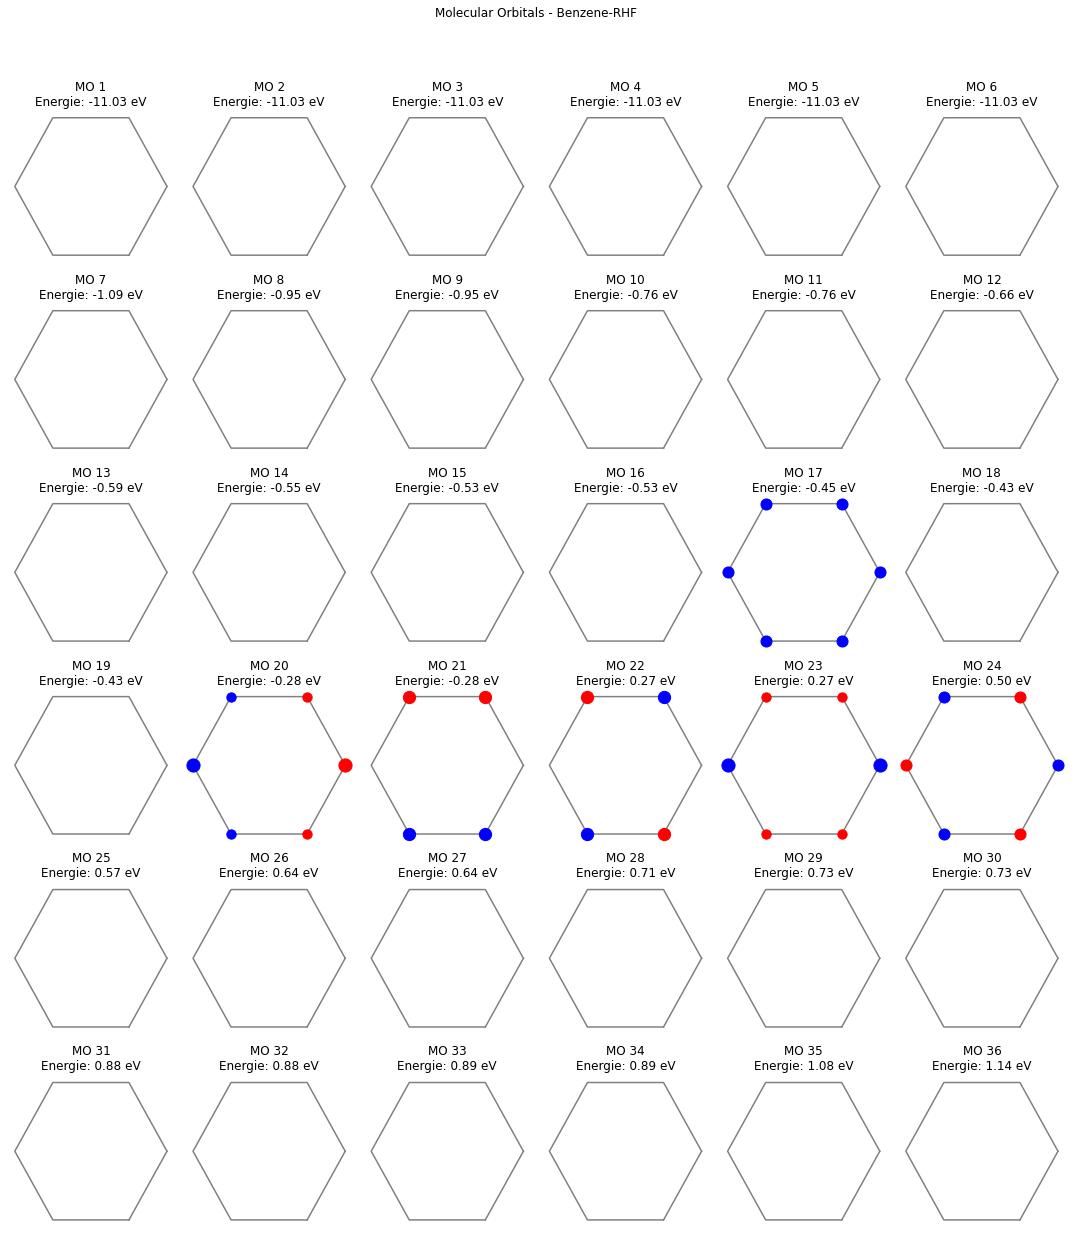

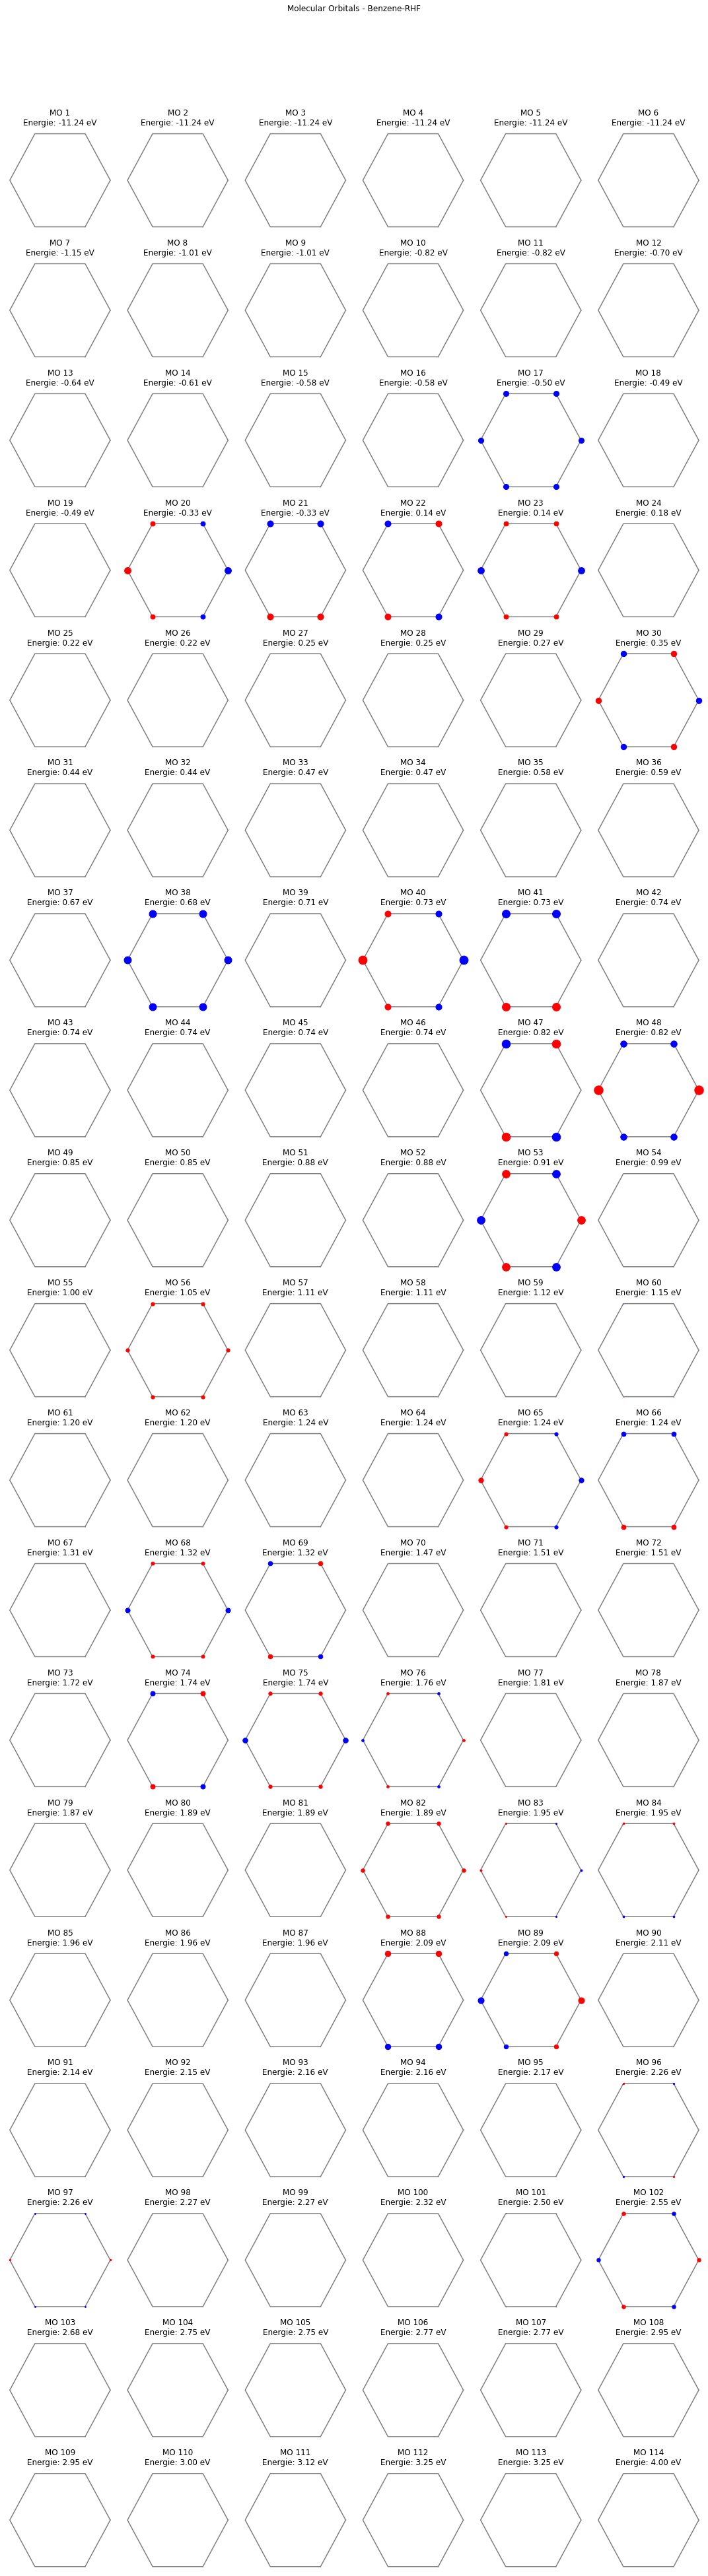

In [6]:
def plotting_of_the_system(eigenvalues, eigenvectors, num_atoms, num_rows):
    eigenvectors = eigenvectors.T

    # Bepaal het aantal rijen en kolommen voor de subplots
    num_mos = len(eigenvalues)
    # num_rows Bijvoorbeeld 2 rijen, zodat de plots onder elkaar worden geplaatst
    num_cols = (num_mos + num_rows - 1) // num_rows

    # Plot de moleculaire orbitalen
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))
    
    for i in range(num_mos):
        ax = axs[i // num_cols, i % num_cols]  # Bepaal de juiste subplot

        # Plot de benzeenring
        benzene_x = np.cos(2 * np.pi / num_atoms * np.arange(num_atoms))
        benzene_y = np.sin(2 * np.pi / num_atoms * np.arange(num_atoms))
        ax.plot(benzene_x, benzene_y, linestyle='-', color='grey')
        ax.plot([benzene_x[-1], benzene_x[0]], [benzene_y[-1], benzene_y[0]], linestyle='-', color='grey')
        
        # Plot de atoomcoëfficiënten als gekleurde bollen
        for j in range(num_atoms):
            c = eigenvectors[i, j]

            if c > 0:
                color = 'blue'
            else:
                color = 'red'

            size = abs(c) * 300  # Schaal de grootte van de bol op basis van de coëfficiënt
            ax.scatter(benzene_x[j], benzene_y[j], s=size, marker='o', color=color, zorder=2)

        ax.set_title(f'MO {i + 1}\nEnergie: {eigenvalues[i]:.2f} eV')

        ax.axis('off')
    
    # Stel het algehele plot-titel in
    plt.suptitle('Molecular Orbitals - Benzene-RHF')

    # Zorg ervoor dat de subplots niet overlappen
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Toon de plot
    plt.show()


# Hieronder wordt de functie aangeroepen met de gegeven eigenschappen
plotting_of_the_system(mo_eigenvalues, pz_orbitals, 6, 6)
plotting_of_the_system(mo_eigenvalues_exp, pz_orbitals_exp, 6, 19)


It can be observed if only the coefficients of only the $p_z$-orbitals of all molecule orbitals are taken that there are different molecule orbitals with a big coefficient for the $p_z$-orbitals. 

A difference can be seen if the basis set of atomic orbitals is changed. When, taking 'sto-3g' as a basis or 'ccpvdz'. The big difference is that in the 'sto-3g'-basis with less orbitals there are only 6 MO's where the 6 $p_z$-orbitals have a prominent coefficient. While in the expanded set of 'ccpvdz' there are a lot of MO's with a prominent coefficient of the $p_z$-orbitals. A lot of this MO's have large energy and will not be occupied by electrons in the groundstate. 

When looking to only the first 30 MO's obtained for benzene. Something is remarkable, there are 6 MO's where the coefficient of the $p_z$-orbitals are prominent for the MO. When compairing this orbitals to the 6 molecular orbitals obtained with the 'sto-3g'-basis, the molecular orbitals look exactly the same. The effect of the bigger basis is the lower energy obtained for the molecular orbitals. 

Energies of the MO's of intrest ($\pi$-system) in when calculating them with rhf in the **'sto-3g'**-basis.
 
$E_{\Psi_0}$=-0.45 eV &nbsp;&nbsp;
$E_{\Psi_{1,2}}$=-0.28 eV &nbsp;&nbsp;
$E_{\Psi_{3,4}}$=0.27 eV &nbsp;&nbsp;
$E_{\Psi_5}$=0.50 eV 

Energies of the MO's of intrest ($\pi$-system) in when calculating them with rhf in the **'ccpvdz'**-basis.

$E_{\Psi_0}$=-0.50 eV &nbsp;&nbsp;
$E_{\Psi_{1,2}}$=-0.33 eV &nbsp;&nbsp;
$E_{\Psi_{3,4}}$=0.14 eV &nbsp;&nbsp;
$E_{\Psi_5}$=0.35 eV 